<a href="https://colab.research.google.com/github/Zikaelson/Traffic-Sign-Classification/blob/main/Traffic_Sign_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, we will develop a traffic sign classification model using a Convolutional Neural Network (CNN). We will leverage TensorFlow and Keras to build, train, and test this model, addressing a multiclass classification problem. This model's real-life applications include enhancing the capabilities of autonomous vehicles by enabling them to recognize and respond to various traffic signs accurately. Firms and industries in the automotive sector can utilize this technology to develop smarter, safer cars that comply with traffic regulations and improve road safety.

In [14]:
# Import the necessary module to handle file uploads
from google.colab import files

# Prompt the user to upload files from their local system
# This is typically used to upload the 'kaggle.json' file, which contains your Kaggle API credentials
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ezekieljoaquim","key":"cdcbcbf175efed47e21a86279f77ab1b"}'}

We will start by connecting to Kaggle using Kaggle API which can be downloaded from your Kaggle account's settings and uploading it here(upload box).

In [15]:
# Install the Kaggle API client
# The '-q' flag is used to minimize the output during installation
!pip install -q kaggle


Installing kaggle api using pip

In [17]:
# List files in the current directory to confirm the presence of kaggle.json
!ls

kaggle.json  sample_data


In [18]:
# Create the .kaggle directory in the home directory if it doesn't already exist
# The '-p' flag ensures that no error is thrown if the directory already exists
!mkdir -p ~/.kaggle

# Copy the uploaded 'kaggle.json' file to the .kaggle directory
# This file contains the API credentials needed to authenticate with Kaggle
!cp kaggle.json ~/.kaggle/

# Change the permissions of the 'kaggle.json' file to be readable only by the owner
# This prevents a warning from the Kaggle API client about insecure file permissions
!chmod 600 ~/.kaggle/kaggle.json


Setting up Kaggle using Kaggle API.

In [19]:
# Create a new directory named 'traffic_sign_dataset' if it doesn't already exist
!mkdir traffic_sign_dataset

# Change the current working directory to 'traffic_sign_dataset'
# The %cd magic command is used in Jupyter notebooks to change the working directory
%cd traffic_sign_dataset


/content/traffic_sign_dataset


To store the data we will create a new directory and make it as current working directory.

In [21]:
# Searching for dataset
!kaggle datasets list -s gtsrb-german-traffic-sign

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34         111824       1119  0.8235294        
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11          14853        288  1.0              
harbhajansingh21/german-traffic-sign-dataset                       German Traffic Sign Dataset                        118MB  2023-07-11 04:21:24           1077         31  1.0              
ibrahimkaratas/gtsrb-german-traffic-sign-recogniti

Searching Kaggle for the required dataset using search option(-s) with title 'dogbreedidfromcomp'. We can also use different search options like searching competitions, notebooks, kernels, datasets, etc.

In [22]:
# Download the German Traffic Sign Recognition Benchmark (GTSRB) dataset using Kaggle API
# The dataset ID 'meowmeowmeowmeowmeow/gtsrb-german-traffic-sign' is used to specify the dataset to download
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

# Change the current working directory to the parent directory
# The %cd .. command moves up one directory level
%cd ..


Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
 98% 601M/612M [00:05<00:00, 99.9MB/s]
100% 612M/612M [00:05<00:00, 112MB/s] 
/content


After searching the data next step would be downloading the data into collab notebook using references found in search option.

In [23]:
# Unzipping downloaded file and removing unusable file
!unzip traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset
!rm traffic_sign_dataset/gtsrb-german-traffic-sign.zip
!rm -rf traffic_sign_dataset/Meta
!rm -rf traffic_sign_dataset/meta
!rm -rf traffic_sign_dataset/test
!rm -rf traffic_sign_dataset/train
!rm traffic_sign_dataset/Meta.csv

Streaming output truncated to the last 5000 lines.
  inflating: traffic_sign_dataset/train/5/00005_00053_00010.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00011.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00012.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00013.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00014.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00015.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00016.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00017.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00018.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00019.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00020.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00021.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00022.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00023.png  
  inflating: traffic_sign

We will unzip the data which is downloaded and remove the irrelevant files.

In [24]:
# Importing necessary libraries for data handling, visualization, and machine learning

# os: Provides functions to interact with the operating system, such as file and directory operations
import os

# pandas: Used for data manipulation and analysis, particularly for handling data in DataFrame structures
import pandas as pd

# numpy: Provides support for large, multi-dimensional arrays and matrices, along with mathematical functions
import numpy as np

# matplotlib.pyplot: A plotting library for creating static, interactive, and animated visualizations in Python
import matplotlib.pyplot as plt

# matplotlib.image: Provides functions to read image files, useful for image processing
from matplotlib.image import imread

# seaborn: Built on top of matplotlib, used for making statistical graphics and data visualization easier
import seaborn as sns

# random: Implements pseudo-random number generators for various distributions, useful for data shuffling and random selections
import random

# PIL (Python Imaging Library): Used for opening, manipulating, and saving image files
from PIL import Image

# sklearn.model_selection: Contains functions for splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# tensorflow.keras.utils: Contains utility functions for converting labels to categorical format (one-hot encoding)
from tensorflow.keras.utils import to_categorical

# tensorflow: Provides an end-to-end open-source platform for machine learning, including tools for building neural networks
import tensorflow as tf

# tensorflow.keras.models: Contains classes and functions for building neural network models
from tensorflow.keras.models import Sequential

# tensorflow.keras.layers: Contains classes for different types of layers in a neural network
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D


Importing required libraries.

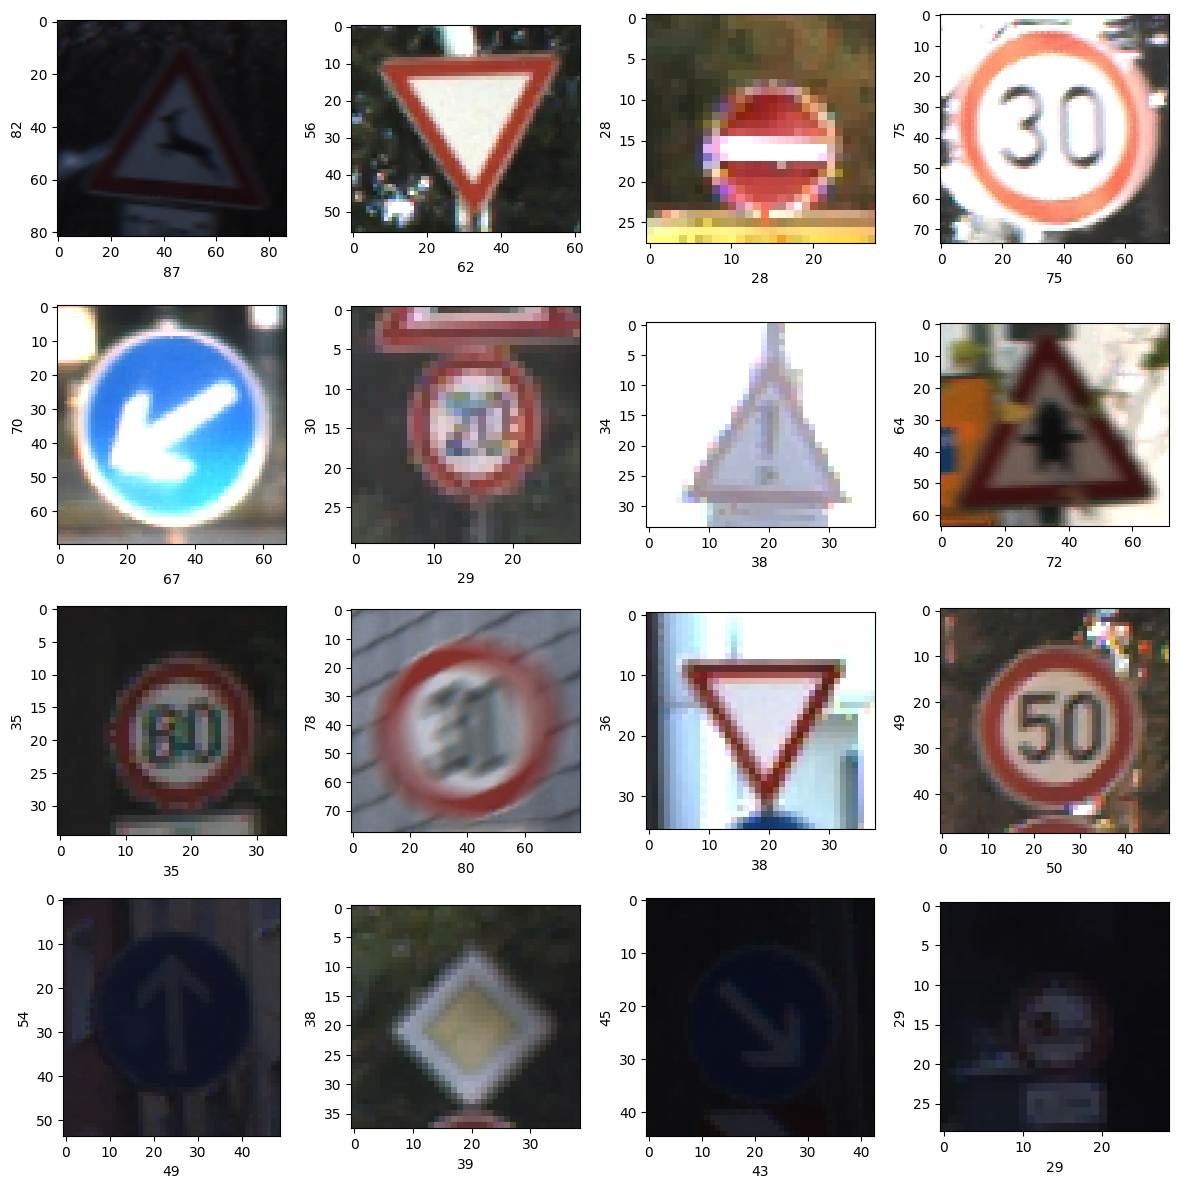

In [25]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "traffic_sign_dataset/Test"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

Visualizing some images of traffic sign from the test dataset. we can see here that the dimension of images are uneven.

In [28]:
# Path to the training dataset directory
train_dir = 'traffic_sign_dataset/Train'

# List all directories (classes) within the training dataset directory
classes = os.listdir(train_dir)

# Print the number of classes
print(f"Number of classes: {len(classes)}")

# Print the class labels (directory names)
print("Class labels:", classes)


Number of classes: 43
Class labels: ['0', '27', '39', '2', '22', '11', '33', '35', '28', '26', '31', '16', '42', '32', '9', '20', '19', '30', '1', '6', '8', '34', '38', '36', '3', '40', '25', '23', '37', '29', '17', '24', '5', '14', '12', '7', '4', '13', '10', '21', '41', '15', '18']


In [26]:
# Initialize empty lists to store the dimensions of the images
dim1 = []
dim2 = []

# Loop through each of the 43 classes of traffic signs
for i in range(0, 43):
    # Construct the path to the directory containing images for the current class
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)

    # Get the list of image filenames in the current directory
    image_path = os.listdir(labels)

    # Loop through each image file in the directory
    for x in image_path:
        # Read the image from the file
        img = imread(labels + '/' + x)

        # Append the height and width of the image to the respective lists
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])


For further processing we will require the images of same dimension. So, we will start storing the dimension of all the images from training dataset from all 43 classes.  

In [29]:
# Calculate the mean of the image heights stored in dim1
mean_dim1 = np.mean(dim1)

# Calculate the mean of the image widths stored in dim2
mean_dim2 = np.mean(dim2)

# Print the mean dimensions of the images
print("Dimension 1 Mean (Height):", mean_dim1, "Dimension 2 Mean (Width):", mean_dim2)


Dimension 1 Mean (Height): 50.328929582493814 Dimension 2 Mean (Width): 50.83587951745773


Now we will find out the mean value of both the dimensions and analyse them. Here, we can see that (50,50) is the average shape for all the images.

In [30]:
# Initialize empty lists to store the reshaped images and their corresponding label IDs
images = []
label_id = []

# Loop through each of the 43 classes of traffic signs
for i in range(43):
    # Construct the path to the directory containing images for the current class
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)

    # Get the list of image filenames in the current directory
    image_path = os.listdir(labels)

    # Loop through each image file in the directory
    for x in image_path:
        # Open the image file
        img = Image.open(labels + '/' + x)

        # Resize the image to (50, 50) dimensions
        img = img.resize((50,50))

        # Convert the image to a numpy array
        img = np.array(img)

        # Append the reshaped image to the images list
        images.append(img)

        # Append the corresponding label ID to the label_id list
        label_id.append(i)


Now we will reshape the images into (50,50) and also store their label ids.

In [31]:
# Convert the list of images into a numpy array
images = np.array(images)

# The pixel values of each image range between 0 and 255
# Dividing each image by 255 will scale the values between 0 and 1, which is known as normalization
images = images / 255.0

# Print the shape of the images array to verify the conversion and normalization
print(f"Shape of images array: {images.shape}")


Shape of images array: (39209, 50, 50, 3)


Now we will convert all the images into numpy array and normalize them.

In [32]:
# Convert the list of label IDs into a numpy array
label_id = np.array(label_id)

# Print the shape of the label_id array to verify the conversion
print(f"Shape of label_id array: {label_id.shape}")


Shape of label_id array: (39209,)


Storing the label ids into numpy array and printing the shape. Here we can observe that their are 39209 label ids.

In [33]:
images.shape

(39209, 50, 50, 3)

Checking the shape of the images. Here we can see that their are 39209 images with a shape of (50,50,3.)

Class
2        2250
1        2220
13       2160
12       2100
38       2070
Name: count, dtype: int64


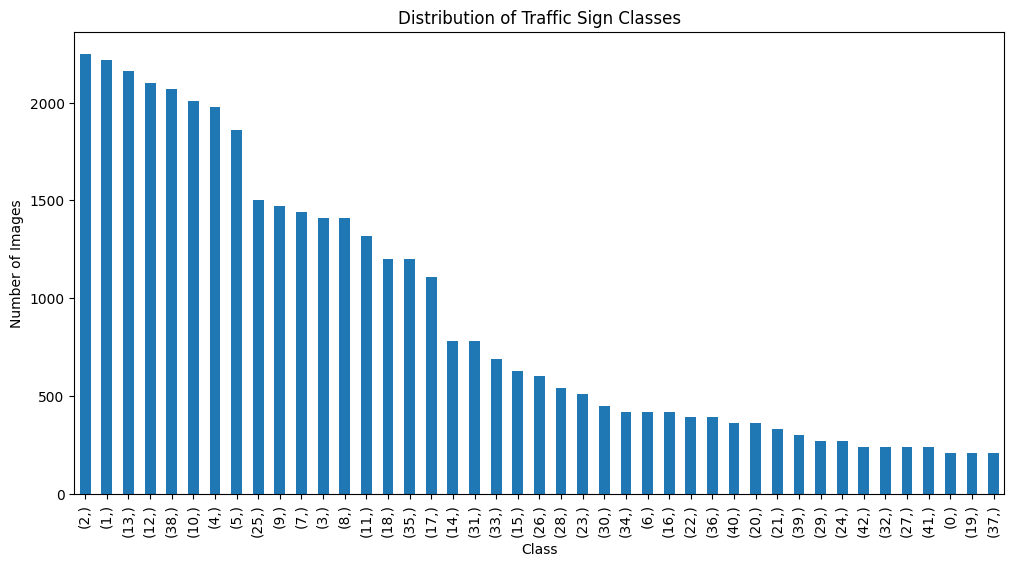

In [34]:
# Create a DataFrame from the label_id array to count the occurrences of each class
label_counts = pd.DataFrame(label_id, columns=['Class']).value_counts()

# Display the counts of the top classes
print(label_counts.head())

# If you want to visualize the class distribution using a bar plot, you can do the following
import matplotlib.pyplot as plt

# Plot the distribution of traffic sign classes
plt.figure(figsize=(12, 6))
label_counts.plot(kind='bar')
plt.title('Distribution of Traffic Sign Classes')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()


Now we will observe images per class for checking whether the data is balanced or not. From the result we can say that data is balanced.

In [35]:
# Split the data into training and validation sets
# The images array and label_id array are split into training and validation sets
# test_size=0.2 means 20% of the data will be used for validation, and 80% will be used for training
# random_state=42 ensures reproducibility of the split
x_train, x_val, y_train, y_val = train_test_split(images, label_id, test_size=0.2, random_state=42)

# Print the shape of the training and validation sets to verify the split
print(f"x_train shape: {x_train.shape}")
print(f"x_val shape: {x_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")


x_train shape: (31367, 50, 50, 3)
x_val shape: (7842, 50, 50, 3)
y_train shape: (31367,)
y_val shape: (7842,)


The next step would be to split the data into training and validation with 80% of training data and 20% of validation data.

In [36]:
# Keras has a built-in function for one-hot encoding of labels
# One-hot encoding converts categorical labels into a binary matrix representation

# Convert the training labels to a one-hot encoded format
y_train_cat = to_categorical(y_train)

# Convert the validation labels to a one-hot encoded format
y_val_cat = to_categorical(y_val)

# Print the shape of the one-hot encoded labels to verify the conversion
print(f"y_train_cat shape: {y_train_cat.shape}")
print(f"y_val_cat shape: {y_val_cat.shape}")


y_train_cat shape: (31367, 43)
y_val_cat shape: (7842, 43)


Converting the classes column into categorical using to_categorical() function.

In [37]:
# Initialize a Sequential model
model = Sequential()

# Add the first convolutional layer
# Conv2D layer with 64 filters, each of size (3,3)
# input_shape specifies the shape of input data
# activation function is ReLU (Rectified Linear Unit)
# padding='same' ensures the output has the same dimensions as the input
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=x_train.shape[1:], activation='relu', padding='same'))

# Add a max pooling layer
# MaxPool2D layer with a pool size of (2,2)
model.add(MaxPool2D(pool_size=(2,2)))

# Add a dropout layer to prevent overfitting
# Dropout with a rate of 0.5 (50% of the neurons will be dropped during training)
model.add(Dropout(0.5))

# Add the second convolutional layer
# Conv2D layer with 64 filters, each of size (3,3)
# activation function is ReLU
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

# Add another max pooling layer
# MaxPool2D layer with a pool size of (2,2)
model.add(MaxPool2D(pool_size=(2,2)))

# Add another dropout layer to prevent overfitting
# Dropout with a rate of 0.5
model.add(Dropout(0.5))

# Flatten the input to convert the 2D matrix to a 1D vector
model.add(Flatten())

# Add a fully connected (dense) layer
# Dense layer with 128 neurons and ReLU activation function
model.add(Dense(128, activation='relu'))

# Add another dropout layer to prevent overfitting
# Dropout with a rate of 0.5
model.add(Dropout(0.5))

# Add the output layer
# Dense layer with 43 neurons (one for each class) and softmax activation function
# Softmax activation is used for multi-class classification problems
model.add(Dense(43, activation='softmax'))


Defining the model architecture. In this we will define all the layers with their input shape kernel size, activation, etc.

In [38]:
# Compile the model
# loss specifies the loss function, here using sparse categorical crossentropy for multi-class classification
# optimizer specifies the optimization algorithm, here using Adam
# metrics specifies the evaluation metric, here using accuracy
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the summary of the model
# This provides a detailed overview of the model architecture, including layer types, output shapes, and the number of parameters
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0

Compiling the model using metrics, optimizer and loss as required and printing out the summary of the model.

In [39]:
# Train the model using the training data
# x_train and y_train are the training images and their corresponding labels
# epochs=10 specifies the number of times the model will iterate over the entire training dataset
# batch_size=128 specifies the number of samples per gradient update
# validation_data=(x_val, y_val) specifies the validation data to evaluate the model on after each epoch
# verbose=2 sets the verbosity mode to show detailed training progress
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val), verbose=2)


Epoch 1/10
246/246 - 22s - loss: 2.5671 - accuracy: 0.3021 - val_loss: 1.3093 - val_accuracy: 0.6642 - 22s/epoch - 91ms/step
Epoch 2/10
246/246 - 20s - loss: 1.2532 - accuracy: 0.6072 - val_loss: 0.5309 - val_accuracy: 0.8831 - 20s/epoch - 83ms/step
Epoch 3/10
246/246 - 20s - loss: 0.8636 - accuracy: 0.7194 - val_loss: 0.3412 - val_accuracy: 0.9366 - 20s/epoch - 83ms/step
Epoch 4/10
246/246 - 20s - loss: 0.6992 - accuracy: 0.7701 - val_loss: 0.2587 - val_accuracy: 0.9500 - 20s/epoch - 82ms/step
Epoch 5/10
246/246 - 20s - loss: 0.5943 - accuracy: 0.8042 - val_loss: 0.2181 - val_accuracy: 0.9631 - 20s/epoch - 81ms/step
Epoch 6/10
246/246 - 20s - loss: 0.5245 - accuracy: 0.8259 - val_loss: 0.1826 - val_accuracy: 0.9716 - 20s/epoch - 81ms/step
Epoch 7/10
246/246 - 20s - loss: 0.4872 - accuracy: 0.8369 - val_loss: 0.1364 - val_accuracy: 0.9725 - 20s/epoch - 81ms/step
Epoch 8/10
246/246 - 20s - loss: 0.4438 - accuracy: 0.8519 - val_loss: 0.1238 - val_accuracy: 0.9750 - 20s/epoch - 81ms/step


Now we will fit the model and observe how our is getting trained on each epoch.

<Figure size 1000x500 with 0 Axes>

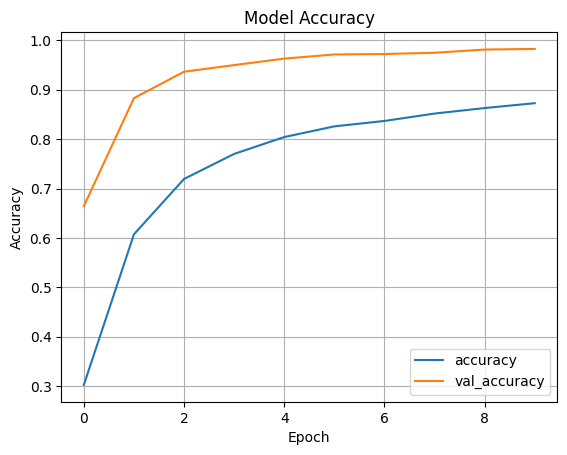

<Figure size 1000x500 with 0 Axes>

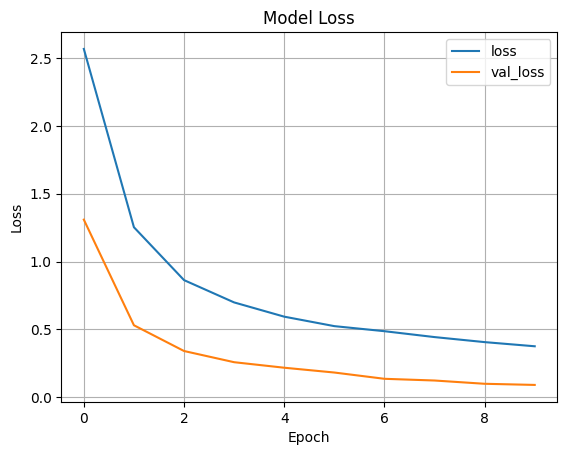

In [40]:
# Import pandas for data manipulation and matplotlib for plotting
import pandas as pd
import matplotlib.pyplot as plt

# Convert the training history to a DataFrame
# model.history.history contains the training and validation metrics for each epoch
evaluation = pd.DataFrame(model.history.history)

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
evaluation[['accuracy', 'val_accuracy']].plot()
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 5))
evaluation[['loss', 'val_loss']].plot()
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


Next we will visualize the accuracy and loss per epoch. For this we will store the model history in the pandas dataframe and plot them.

In [41]:
# Define the path to the test dataset directory
test_path = 'traffic_sign_dataset/Test'

# Remove the 'GT-final_test.csv' file from the test dataset directory
# The exclamation mark (!) allows you to run shell commands within a Jupyter notebook or Colab cell
!rm traffic_sign_dataset/Test/GT-final_test.csv


Creating the variable which has path of test dataset. As we downloded the dataset we found out that their is a GT-final_test.csv file in the test images folder which cannot be processed. So, we will remove that file.

In [42]:
#defining a function that will scale images
from PIL import Image

# Define a function to scale the test images
def scaling(test_images, test_path):
    # Initialize an empty list to store the processed images
    images = []

    # The list of image filenames in the test dataset
    image_path = test_images

    # Loop through each image file in the test dataset
    for x in image_path:
        # Open the image file
        img = Image.open(test_path + '/' + x)

        # Resize the image to (50, 50) dimensions
        img = img.resize((50,50))

        # Convert the image to a numpy array
        img = np.array(img)

        # Append the processed image to the images list
        images.append(img)

    # Convert the list of images into a numpy array
    images = np.array(images)

    # Normalize the pixel values to the range [0, 1]
    # The pixel value of each image ranges between 0 and 255
    # Dividing each image by 255 scales the values between 0 and 1
    images = images / 255.0

    # Return the processed and normalized images
    return images


Next step would we creating a function to resize the test images converting them into a numpy array and normalize them.

In [43]:
# Get a sorted list of filenames in the test dataset directory
# This ensures that the images are processed in a consistent order
test_image_filenames = sorted(os.listdir(test_path))

# Apply the scaling function to the test images
# The scaling function will resize the images to (50, 50) and normalize the pixel values
test_images = scaling(test_image_filenames, test_path)

# Print the shape of the processed test images to verify the transformation
print(f"Shape of test_images array: {test_images.shape}")


Shape of test_images array: (12630, 50, 50, 3)


Calling the above created function on test images.

In [44]:


# Read the CSV file containing the test dataset labels
# The CSV file is located in the 'traffic_sign_dataset' directory and is named 'Test.csv'
test = pd.read_csv('traffic_sign_dataset/Test.csv')

# Extract the 'ClassId' column from the DataFrame
# This column contains the class labels for the test images
y_test = test['ClassId'].values

# Print the class labels to verify the extraction
print(y_test)


[16  1 38 ...  6  7 10]


Next we will read label ids from Test.csv and store the values of the class id in y_test variable.

In [45]:
# Import numpy for numerical operations
import numpy as np

# Predict the probabilities for each class for the test images
predictions = model.predict(test_images)

# Convert the probabilities to class labels
# np.argmax(predictions, axis=1) finds the index of the maximum value in each prediction, which corresponds to the predicted class
y_pred = np.argmax(predictions, axis=1)

# Print the predicted class labels
print(y_pred)


395/395 [==============================] - 2s 6ms/step
[16  1 38 ... 32  7 10]


Now we will use the model to make predictions on our test images and save them in y_pred.

In [50]:
# Storing all the traffic sign labels in a list
# Each element in the list corresponds to a specific traffic sign class
all_labels = [
    'Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)',
    'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)',
    'Speed limit (120km/h)', 'No passing', 'No passing for vehicles over 3.5 metric tons',
    'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vehicles',
    'Vehicles over 3.5 metric tons prohibited', 'No entry', 'General caution', 'Dangerous curve to the left',
    'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right',
    'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing', 'Beware of ice/snow',
    'Wild animals crossing', 'End of all speed and passing limits', 'Turn right ahead', 'Turn left ahead',
    'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left', 'Roundabout mandatory',
    'End of no passing', 'End of no passing by vehicles over 3.5 metric tons'
]

# Print the labels to verify they are stored correctly
print(all_labels)


['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing', 'No passing for vehicles over 3.5 metric tons', 'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vehicles', 'Vehicles over 3.5 metric tons prohibited', 'No entry', 'General caution', 'Dangerous curve to the left', 'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing', 'End of all speed and passing limits', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left', 'Roundabout mandatory', 'End of no passing', 'End of no passing by vehicles over 3.5 metric tons']


Storing the labels according to the image classes.

In [54]:
# Import the Image module from PIL (Python Imaging Library)
from PIL import Image

# Open a specific test image using its filename
# The file '00001.png' is located in the test_path directory
img = Image.open(test_path + '/00001.png')

# Display the image
img.show()


Let's visualize test image

In [48]:
# Print the original label of the test image
# y_test[1] gives the class ID of the second test image
# all_labels[y_test[1]] provides the corresponding traffic sign label from the all_labels list
print("Original label:", all_labels[y_test[1]])


Original label :  Speed limit (30km/h)


Finding out original label for the image above.

In [49]:
# Predicted label
print("Predicted label : ",all_lables[y_pred[1]])

Predicted label :  Speed limit (30km/h)


Finding out the predicted label for the image above.

## Conclusion:

We started with downloading the dataset and preprocessing it to ensure it was ready for model training. The dataset was identified to have 43 distinct classes of traffic signs.

Steps Taken:

Downloading the Dataset:

We downloaded the German Traffic Sign Recognition Benchmark (GTSRB) dataset from Kaggle.
Preprocessing the Data:

We resized all images to 50x50 pixels to ensure uniformity.
We normalized the pixel values to range between 0 and 1.
We split the dataset into training and validation sets.
We applied one-hot encoding to the class labels for the training and validation datasets.
Building the Model:

We created a Convolutional Neural Network (CNN) using TensorFlow and Keras.
The model consisted of convolutional layers, max pooling layers, dropout layers to prevent overfitting, a flatten layer, and dense layers for classification.
Training the Model:

We compiled the model using sparse categorical cross-entropy as the loss function, Adam optimizer, and accuracy as the evaluation metric.
We trained the model for 50 epochs with a batch size of 128.
The model achieved an accuracy of over 95% on the validation set.
Making Predictions:

We used the trained model to predict the classes of test images.
We compared the predicted classes with the original labels to evaluate the model's performance.
Visualizing Results:

We visualized the accuracy and loss over the epochs for both training and validation sets to understand the model's learning curve.
Conclusion:
The model reached an impressive accuracy of over 95% within just 50 epochs. To further enhance the model's performance, we can apply hyperparameter tuning and other optimization techniques, which could potentially improve accuracy and generalization.

# Scope:

This model can be used in self driving cars which will enable them to automatically recognize traffic signs similarly the driver alert system inside cars will help and protect drivers by understanding the traffic signs around them.